# Tutorial 4: Cross-modality representation of spatial RNA-ATAC co-profiling E18.5 mouse brain data generated by MISAR-seq

The [spatial RNA-ATAC co-profiling E18.5 mouse brain sample](https://www.nature.com/articles/s41592-023-01884-1), generated by MISAR-seq technique, measured the spatial transcriptomic and ATAC-seq profiles simultaneously.

In [1]:
import warnings
import pandas as pd
import numpy as np
import scanpy as sc
import episcanpy.api as epi
from PRESENT import PRESENT_function

warnings.filterwarnings("ignore")
sc.set_figure_params(dpi=80, figsize=(4,4), facecolor="white")

In [2]:
adata_atac = sc.read_h5ad("Data/E18_5_atac.h5ad")
print(adata_atac)
adata_rna = sc.read_h5ad("Data/E18_5_expr.h5ad")
print(adata_rna)

AnnData object with n_obs × n_vars = 2129 × 294734
    obs: 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_Mito

## Run PRESENT model

In [3]:
adata = PRESENT_function(
    spatial_key = "spatial", ## obsm key under which to load the spatial matrix of spots
    adata_rna = adata_rna, ## The RNA raw fragment count matrix of spots in anndata.AnnData format
    gene_min_cells = 1, ## Minimum number of cells expressed required for a gene to pass filtering
    num_hvg = 3000, ## Number of highly variable genes to select for RNA data
    adata_atac = adata_atac, ## The ATAC raw fragment count matrix of spots in anndata.AnnData format
    peak_min_cells_fraction = 0.03, ## Minimum fraction of cells accessible required for a peak to pass filtering
    nclusters = adata_atac.obs["Annotation_for_Combined"].nunique(),
    device = "cuda" ## Device used for training: cuda or cpu
)
print(adata)

Loading data and parameters...


Input data has been loaded


Computing METIS partitioning...
Done!
Model training:  42%|████▏     | 42/100 [02:17<03:09,  3.27s/it, NLL_loss=0.665, BNN_loss=0.233, MSE_loss=0.321, IOA_loss=0.102, ES counter=20, ES patience=20]


Early stop the training process


Succeed to find 10 clusters at resolution 0.562
AnnData object with n_obs × n_vars = 2129 × 50
    obs: 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'Gex_Rib

## Visualization

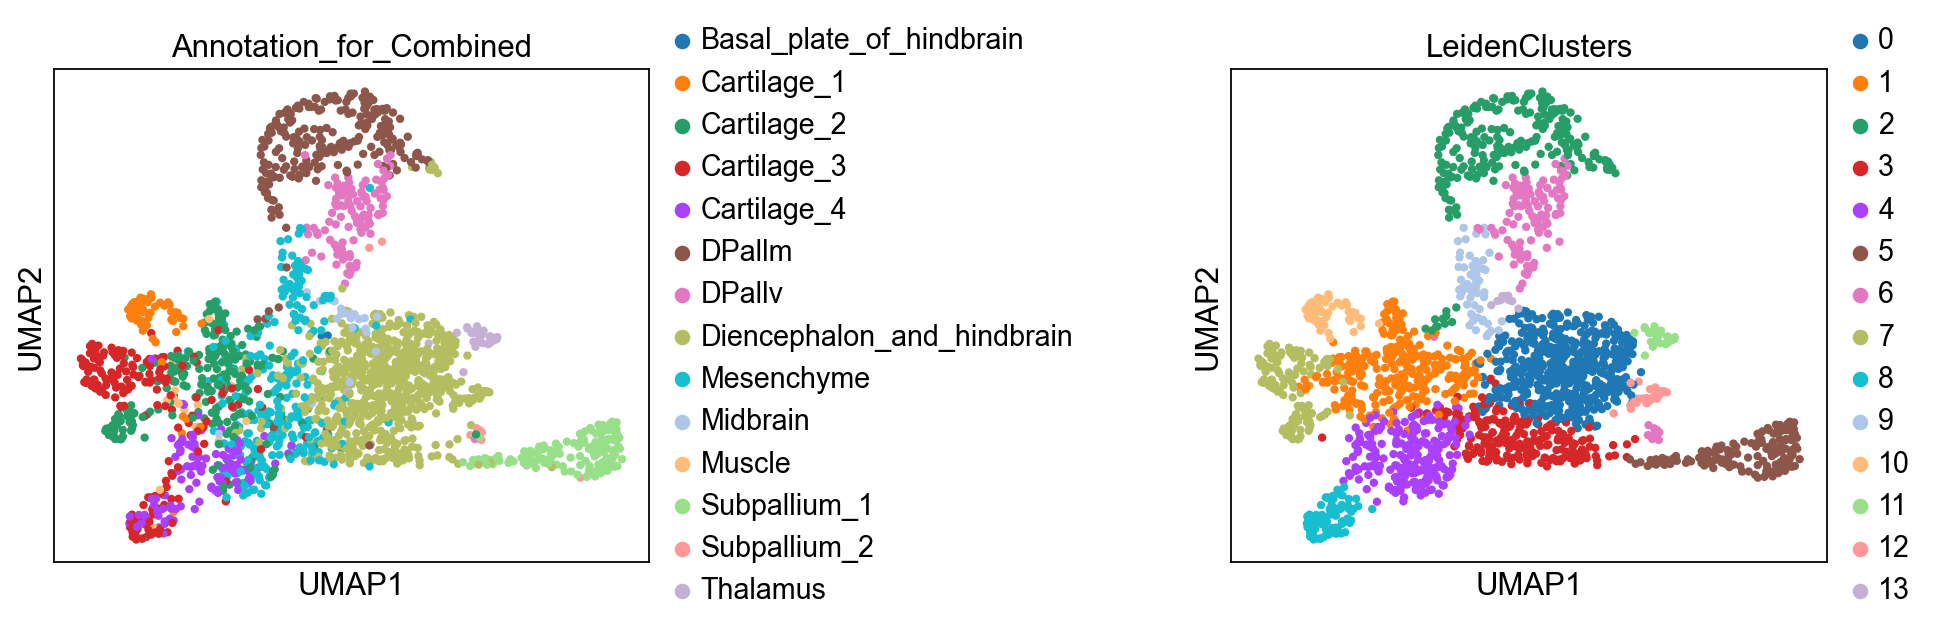

In [4]:
sc.pp.neighbors(adata, use_rep="embeddings")
sc.tl.umap(adata)
sc.pl.umap(adata, color=["Annotation_for_Combined", "LeidenClusters"], wspace=0.8)

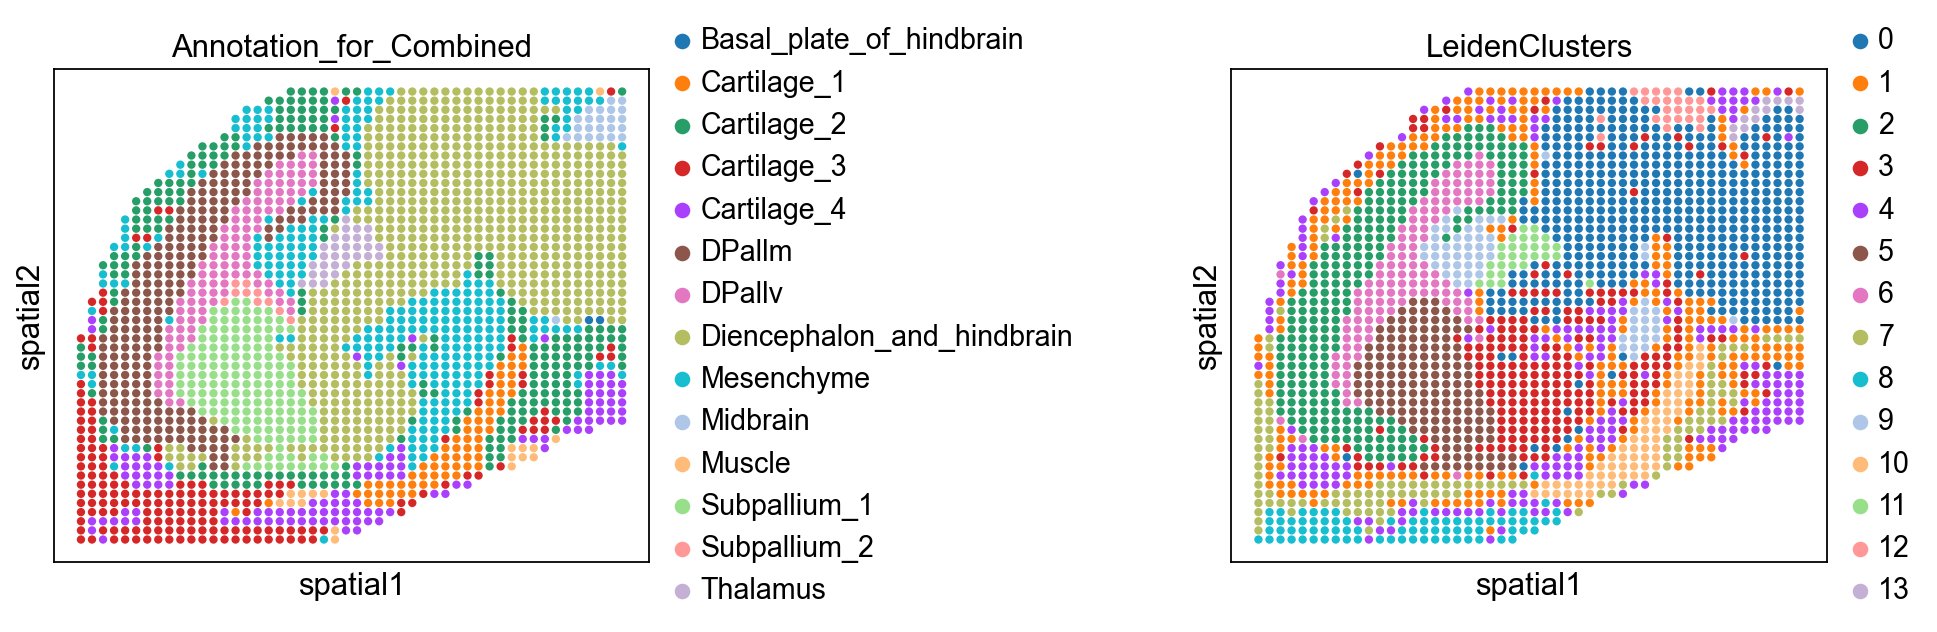

In [5]:
sc.pl.embedding(adata, basis="spatial", color=["Annotation_for_Combined", "LeidenClusters"], wspace=0.8)